<font color=skyblue>Neural Network</font>

<font color=yellow>Loading Wine Data</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('data/Wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤 N x p
y = np.array(df.iloc[:, -1])

# Split data into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) # 標準化訓練資料
X_test_ = scaler.fit_transform(X_test) # 標準化測試資料

<font color=yellow>Neural Network 幾個重要的 Hyper-parameters</font>

- hidden layer 的數量
- hidden layer 的 neuron 數量
- activation function
- solver

Iteration 1, loss = 1.20921516
Iteration 2, loss = 1.20352794
Iteration 3, loss = 1.19797481
Iteration 4, loss = 1.19255331
Iteration 5, loss = 1.18726284
Iteration 6, loss = 1.18210384
Iteration 7, loss = 1.17707722
Iteration 8, loss = 1.17218411
Iteration 9, loss = 1.16742559
Iteration 10, loss = 1.16280268
Iteration 11, loss = 1.15831620
Iteration 12, loss = 1.15396679
Iteration 13, loss = 1.14975488
Iteration 14, loss = 1.14568066
Iteration 15, loss = 1.14174410
Iteration 16, loss = 1.13794491
Iteration 17, loss = 1.13428259
Iteration 18, loss = 1.13075636
Iteration 19, loss = 1.12736524
Iteration 20, loss = 1.12410800
Iteration 21, loss = 1.12098317
Iteration 22, loss = 1.11798910
Iteration 23, loss = 1.11512388
Iteration 24, loss = 1.11238544
Iteration 25, loss = 1.10977151
Iteration 26, loss = 1.10727962
Iteration 27, loss = 1.10490716
Iteration 28, loss = 1.10265137
Iteration 29, loss = 1.10050932
Iteration 30, loss = 1.09847799
Iteration 31, loss = 1.09655423
Iteration 32, los

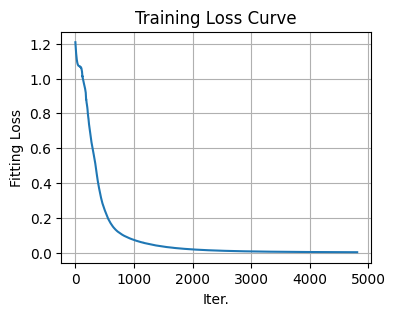

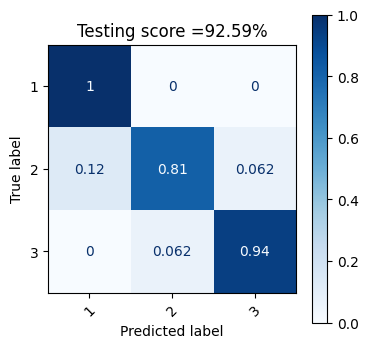

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# hidden_layers = (512,) # one hidden layer
# activation = 'relu' # the default
hidden_layers = (20,) # one hidden layer
activation = 'logistic' # the default= 'relu'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
        activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = 'sgd' # not efficient, need more tuning
# solver = 'lbfgs' # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts) 
clf_MLP.fit(X_train, y_train) # X_train = (samples, features), y_train = (samples,)
predictions = clf_MLP.predict(X_test) #output a class label for each sample
# print("accuracy for tested data: {:.2f}%".format(100*np.mean(y_test_hat == y_test)))
print("accuracy for test data: {:.2f}%".format(100*clf_MLP.score(X_test, y_test)))
print(classification_report(y_test, predictions))

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.plot(clf_MLP.loss_curve_)
plt.grid(True)
plt.title('Training Loss Curve')
plt.xlabel('Iter.')
plt.ylabel('Fitting Loss')
plt.show()

# Confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# Confusion matrix
title = 'Testing score ={:.2f}%'.format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
        clf_MLP,
        X_test,
        y_test,
        xticks_rotation=45, #'vertical',
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize='true',
        ax = ax
    )
disp.ax_.set_title(title)
plt.show() 